>> Yazeed Alobaidan

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import re
from tqdm import tqdm


EDA

In [10]:
df = pd.read_excel("/content/purchase-order-items.xlsx")
df.head(-1)

,Item ID,Item Name,Quantity,Total Bcy,Sub Total Bcy,Purchase Order ID,Product ID,Currency Code,Account ID,Tax ID,Project ID
0,3263831000000089042,NaN,75.21,227510.25,227510.25,3263831000000089040,NaN,SAR,3263831000000034003,3.263831e+18,NaN
1,3263831000000089046,NaN,15.00,47250.00,47250.00,3263831000000089040,NaN,SAR,3263831000000034003,3.263831e+18,NaN
2,3263831000000089044,NaN,50.00,160000.00,160000.00,3263831000000089040,NaN,SAR,3263831000000034003,3.263831e+18,NaN
3,3263831000000092044,NaN,12.00,38280.00,38280.00,3263831000000092040,NaN,SAR,3263831000000034003,3.263831e+18,NaN
4,3263831000000092052,NaN,2.00,5900.00,5900.00,3263831000000092040,NaN,SAR,3263831000000034003,3.263831e+18,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3144,3263831000016006015,"ITTIFAQ STEEL 20mm, 12 meter",30.00,69000.00,69000.00,3263831000016006001,3.263831e+18,SAR,3263831000000034003,3.263831e+18,NaN
3145,3263831000016006011,"ITTIFAQ STEEL 14mm, 12 meter",30.00,69000.00,69000.00,3263831000016006001,3.263831e+18,SAR,3263831000000034003,3.263831e+18,NaN
3146,3263831000016006009,"ITTIFAQ STEEL 12mm, 12 meter",30.00,69000.00,69000.00,3263831000016006001,3.263831e+18,SAR,3263831000000034003,3.263831e+18,NaN
3147,3263831000016208289,حديد تسليح مجدول سعودي سابك 16 مم * 12 م,30.00,69000.00,69000.00,3263831000016208283,3.263831e+18,SAR,3263831000000034003,3.263831e+18,NaN


In [11]:
df.isna().sum()

,0
Item ID,0
Item Name,240
Quantity,0
Total Bcy,0
Sub Total Bcy,0
Purchase Order ID,0
Product ID,240
Currency Code,0
Account ID,0
Tax ID,65


drop unused column

In [12]:
df= df.drop('Project ID', axis=1)

In [13]:
df.isna().sum()

,0
Item ID,0
Item Name,240
Quantity,0
Total Bcy,0
Sub Total Bcy,0
Purchase Order ID,0
Product ID,240
Currency Code,0
Account ID,0
Tax ID,65


Cleaning the data

In [14]:
df= df.dropna()

In [15]:
df.isna().sum()

,0
Item ID,0
Item Name,0
Quantity,0
Total Bcy,0
Sub Total Bcy,0
Purchase Order ID,0
Product ID,0
Currency Code,0
Account ID,0
Tax ID,0


In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df['Item Name'].value_counts()

,count
Item Name,
حديد سابك 16 ملم 12 م,13
حديد تسليح اتفاق 14مم 12متر,11
حديد تسليح اتفاق 20مم 12متر,11
حديد تسليح اتفاق 16مم 12متر,11
حديد تسليح سابك مسحوب 6 متر 8 مم,9
...,...
HR Sheet 3.0x1000x2000mm,1
مستطيل حديد مقاس 20*30 مم سماكة 1.5 مم طول 6 م,1
صاج حديد أسود مقاس 1000*2000 مم سماكة مم 9.80,1


In [18]:
print(list(df['Item Name'].unique()))


['HEB 200X200X15X9MMX12MTR', 'HEB 280X280X10.5X18MMX12MTR', 'IPE 300X150X7.1X10.7X12MTR', 'HEB 260X260X10X17.5MMX12MTR', 'Corrugated Sheet 1x6 mtr x 0.50 mm', 'B.SHEET 1.5X6 MTRX20 MM', 'GI Sheet 1000 x 3000 x 1.2 mm (1758)', 'ماسورة حديد مقاس 1.5 بوصة سماكة 2.8 مم طول 6 م', 'HR Sheet 5.8x1000x2000mm', 'ماسورة حديد مقاس 1 بوصة سماكة 1.5 مم طول 6 م', 'صاج حديد أسود مقاس 1000*2000 مم سماكة مم 9.80', 'مستطيل حديد مقاس 20*30 مم سماكة 1.5 مم طول 6 م', 'HR Sheet 3.0x1000x2000mm', 'HR Sheet 1.5x1220x2440mm', 'Tube 40x40x1.20x6000MM', 'Pipe 1.25 inch x 1.5 x 6000 mm', 'HR Sheet 7.80x1000x2000mm', 'مربع حديد مقاس 16*16 مم سماكة 1.5 مم طول 6 م', 'مبروم املس 10*6000 مم', 'مبسط حديد 40*8*6000 مم', 'Tube 25x25x1.2x6000mm', 'GI Wire Mesh 12x12x1MM (ROLL)', 'Expansion Bolt M12x150MM', 'HDG Angel 65x65x6mm, 6M', 'HDG Stiffiner Plate 50x50x5MM', 'HDG Grating 1000 mm x 6000mm, PLAIN, open ends, panels, Mesh sizes 30 mm x 100 mm (center to center)', 'HDG Angel 90x90x6MM Long 130MM Long 130MM with 4 holes

In [19]:
def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = text.split()
    return ' '.join(tokens)

# Apply preprocessing
df['Cleaned Item Name'] = df['Item Name'].apply(preprocess_text)

In [20]:
# Generate text embeddings using TF-IDF
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(df['Cleaned Item Name'])

it wouldn't be a good idea to use TF-IDF in the actual data since it's not advanced enough. A proper approach would be to use advanced multi-language embedding models.

I'm just using TF-IDF because there's no time and it's an assignment

100%|██████████| 24/24 [00:00<00:00, 36.16it/s]


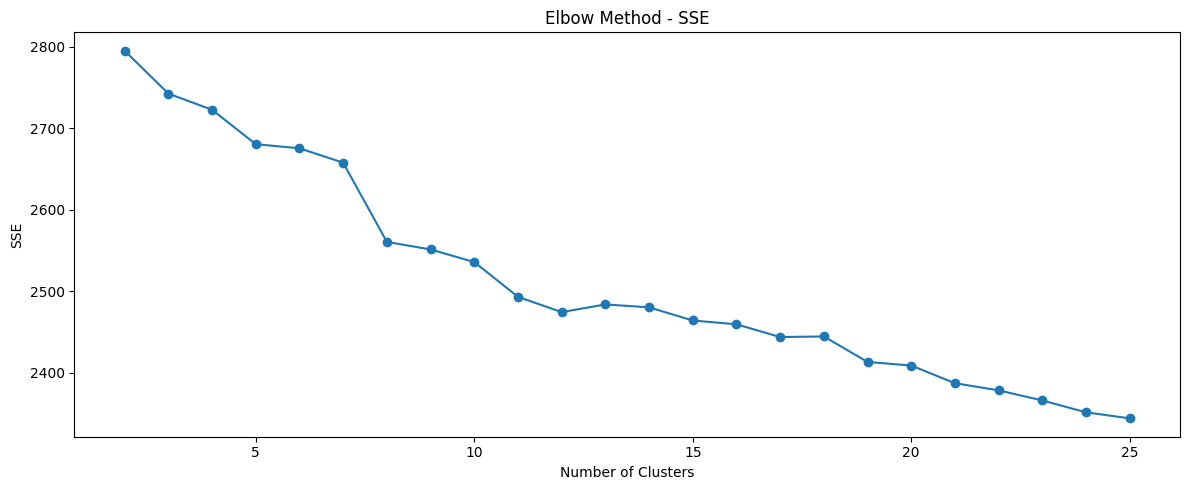

In [21]:
# Elbow method: SSE
sse = []
sil_scores = []
k_range = range(2, 26)
for k in tqdm(k_range):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_tfidf)
    sse.append(kmeans.inertia_)

# Plot the elbow and silhouette
plt.figure(figsize=(12, 5))

plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method - SSE')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

plt.tight_layout()
plt.show()

In [22]:
# Use KMeans clustering to group similar items
kmeans = KMeans(n_clusters=12, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_tfidf)

I think it would be better by far to use some rule-based method to categorize the items, instead of using the embedding. However, with the short time, using embedding and clustering would be sufficient

# Spend Proportion Analysis

In [23]:
# Calculate the proportion of spend (Total Bcy) across clusters
spend_by_cluster = df.groupby('Cluster')['Total Bcy'].sum()
total_spend = spend_by_cluster.sum()
spend_proportion = (spend_by_cluster / total_spend).sort_values(ascending=False)

# Merge spend proportion back to the dataframe
df['Spend Proportion'] = df['Cluster'].map(spend_proportion)


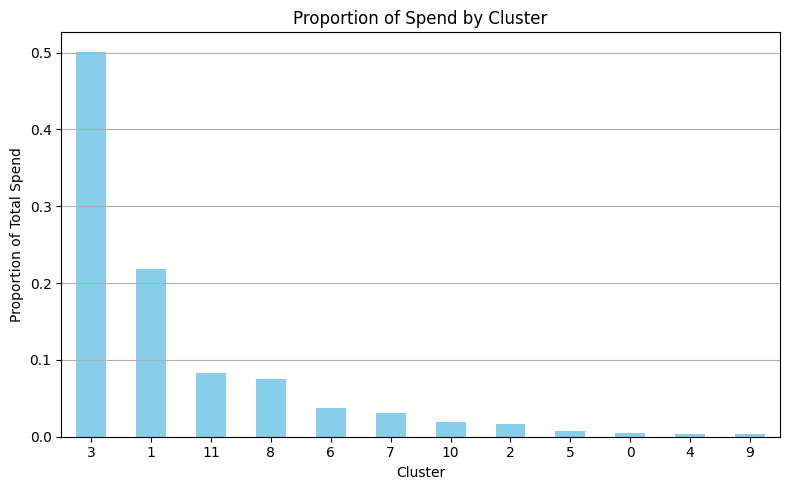

In [24]:

# Prepare a bar chart for visualization
plt.figure(figsize=(8, 5))
spend_proportion.plot(kind='bar', color='skyblue')
plt.title('Proportion of Spend by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proportion of Total Spend')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [25]:
# showcase what's in the cluster 3

cluster_3_items = df[df['Cluster'] == 3]['Item Name'].unique()
print("Items in Cluster 3:")
for item in cluster_3_items:
    print(item)

Items in Cluster 3:
HEB 200X200X15X9MMX12MTR
HEB 280X280X10.5X18MMX12MTR
IPE 300X150X7.1X10.7X12MTR
HEB 260X260X10X17.5MMX12MTR
B.SHEET 1.5X6 MTRX20 MM
Tube 40x40x1.20x6000MM
Pipe 1.25 inch x 1.5 x 6000 mm
مبروم املس 10*6000 مم
مبسط حديد 40*8*6000 مم
Tube 25x25x1.2x6000mm
GI Wire Mesh 12x12x1MM (ROLL)
Expansion Bolt M12x150MM
HDG Angel 65x65x6mm, 6M
HDG Stiffiner Plate 50x50x5MM
HDG Angel 90x90x6MM Long 130MM Long 130MM with 4 holes
GI Bolt M16x50MM long
HDG IPEA 180 (177x91x6.5x4.3), 12 M
Expansion Bolt M16x160MM
HDG TRANSFORMER RAIL QU100 - WT:88.96 KG/M - LENGHT: 1.86M
HDG PLATE 300X110X12MM WITH 2 HOLES
HDG ANGLE 70*70*6MM, 12MTR
HDG TRANSFORMER RAIL QU100 - WT:88.96 KG/M - LENGHT: 2.05M
RAIL CLAMP
HDG TRANSFORMER RAIL QU100 - WT:88.96 KG/M - LENGHT: 1.55M
HDG M12 ANCHOR BOLT, LENGHT400MM
HDG ANGEL 50*50*5MM, 12MTR LENGTH CUTTING AS RAILS WELDED WITH ANCHOR BAR 10MM LONG 150MM @300C/C
HDG TRANSFORMER RAIL QU100 - WT:88.96 KG/M - LENGHT: 2.531M
HDG TRANSFORMER RAIL QU100 - WT:88.96 

 Cluster Distribution

In [26]:
# check the number of items in each cluster

cluster_counts = df['Cluster'].value_counts().sort_index()
print("Number of items in each cluster:")
print(cluster_counts)

Number of items in each cluster:
Cluster
0        4
1      291
2       66
3     1671
4       99
5       57
6       86
7      103
8      107
9       70
10     169
11     122
Name: count, dtype: int64


#  Quantity per Cluster

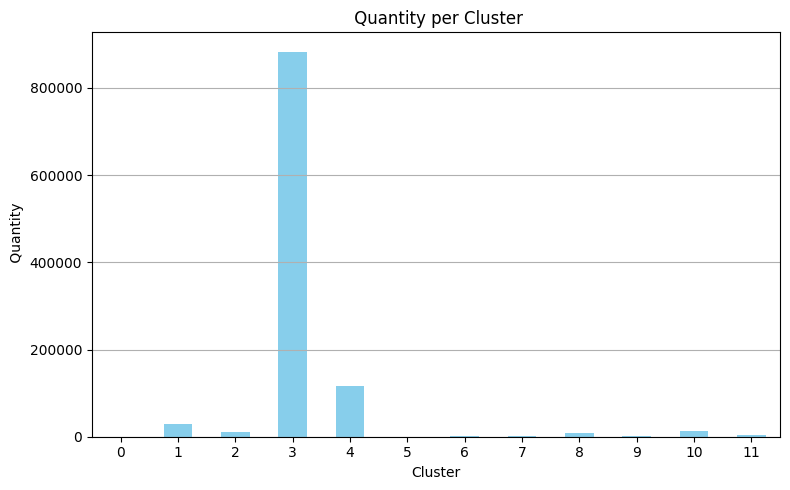

In [39]:
# Total quantity per cluster
cluster_qty = df.groupby('Cluster')['Quantity'].sum()

plt.figure(figsize=(8, 5))
cluster_qty.plot(kind='bar', color='skyblue')
plt.title(' Quantity per Cluster')
plt.xlabel('Cluster')
plt.ylabel(' Quantity')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Avg Spend per Item in Cluster

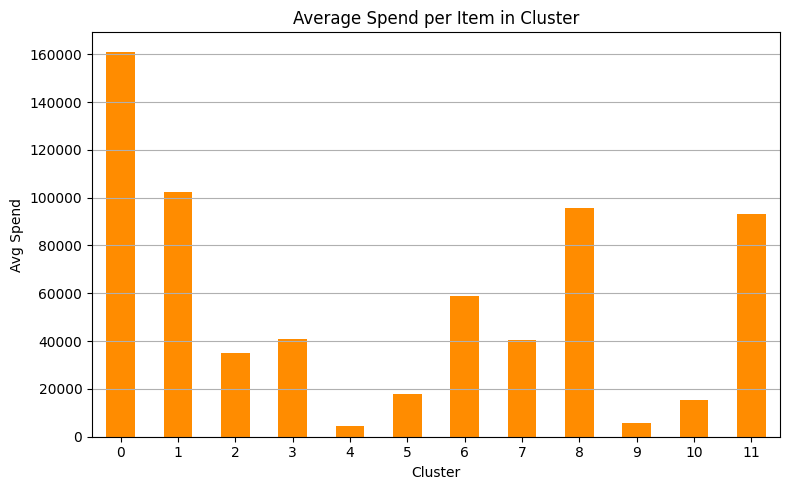

In [40]:
# Avg Spend per Item in Cluster
cluster_count = df.groupby('Cluster').size()

avg_spend_per_item = spend_by_cluster / cluster_count

plt.figure(figsize=(8, 5))
avg_spend_per_item.plot(kind='bar', color='darkorange')
plt.title('Average Spend per Item in Cluster')
plt.xlabel('Cluster')
plt.ylabel('Avg Spend')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Insights

## Proportion of Spend by Cluster


* Cluster 3, with 1,671 items, is responsible for ~50% of total spend, making it the largest driver of procurement cost.

* Cluster 1 contributes for ~22% of spend, which is significant but still less than half of Cluster 3's.

* Clusters 11, 8, and 6 have moderate spend proportions and could contain supporting or infrastructure-related items.

* Clusters like 0, 2, 4, 5, 9 contribute minimally to total spend.


With how high Cluster 3 are, This suggests it includes core construction or operational materials.


## Total Quantity per Cluster

* Cluster 3 again leads, with an extremely high purchase volume, implying it contains high-rotation or stock materials.

* Clusters 1 (291) and 4 (99 items) also shows a surprisingly high quantity, suggesting its items are low-cost but frequently purchased.

* Clusters like 0 (4 items), 5 (57), and 9 (70) are low in quantity, pointing to rare, custom, or high-cost low-rotation items.

##  Average Spend per Item per Cluster

* Cluster 0 (only 4 items) has the highest average spend, exceeding 160,000 per item which strongly points to capital assets or high-end equipment.

* Cluster 1, with 291 items, also shows high average spend

* Clusters like 4 (99 items) and 9 (70) show very low average spend

* Cluster 3’s average spend is moderate, despite its size,  confirming it includes mid-value items purchased at high volume.